In [1]:
import mot
import numpy as np
import copy

(0, 0.006122206479939054)
0.006122206479939009
Testing analytic off axis formula against on-axis formula
Maximum relative error: 2.9140850556922124e-12
Mean relative error: 9.540492604202763e-14
TEST PASSED
[ 0.    -0.037]


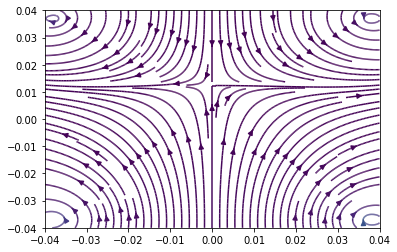

Coil #0:
Diameter: 0.08 meters
 turns*current: 116*6.50 amps
 origin: [ 0.    -0.037]
Coil #1:
Diameter: 0.08 meters
 turns*current: 116*-2.50 amps
 origin: [0.    0.037]

Field minimum @ r=-0.0008163265306122477, z=0.012350435265789966


array([[ 10.50609685,   0.10973462],
       [  0.10914032, -21.01072173]])

In [2]:
## Create a loop of wire
## Specify the diameter, number of turns, current, and origin (location of center)
loop=mot.magneticCoil(diameter=2*0.038,turns=48+68,current=6.5,origin=[0,-0.074/2])

#loop.field, and loop.fieldOnAxis for evaluating the field strength
print(loop.field(0,1))
print(loop.fieldOnAxis(1))

## Compare the analytic formula to the on-axis formula to verify no mistakes
loop.consistencyCheck()

## Create a shifted copy
loop2=loop.copy()
loop2.shift([0,0.074])

# Change the current thru the second loop
loop2.current=-2.5
print(loop.origin)

## Create a mot coils system out of the two lo40s
coils=mot.coilSystem([loop,loop2])
## Create a rectangle about the origin for searching for field zeros
coils.setROI((-0.040,0.040,50),(-0.040,0.040,5400))
coils.view()

## human readable description of the coil system
print(coils)

## Find the minimum field strength in the ROI
## Compute the gradient at this position
coils.gradient()

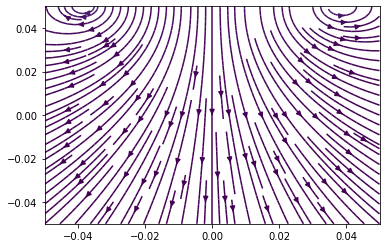

In [3]:
system2=mot.coilSystem(coils.coils[1])
system2.coils[0].origin=[0,0.05]
system2.setROI((-0.05,0.05,50),(-0.05,0.05,50))
system2.view()

In [ ]:
system2.coils[0].origin=[0,0.5]
system2.view()